In [62]:
import csv
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
import h5py

In [2]:
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

In [55]:
lines = []
with open('D:\\SDC_Term1_Data\\driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

images = []
measurements = []
for line in lines:
    for i in range(3):
        source_path = line[i]
        image = cv2.imread(source_path)
        images.append(image)
        measurement = (i==0)*0.1 + float(line[3]) + (i==2)*(-0.1)
        measurements.append(measurement)
X_train = np.array(images)
y_train = np.array(measurements)

# with open(csv_file, 'r') as f:
#     reader = csv.reader(f)
#     for row in reader:
#         steering_center = float(row[3])
# 
#         # create adjusted steering measurements for the side camera images
#         correction = 0.2 # this is a parameter to tune
#         steering_left = steering_center + correction
#         steering_right = steering_center - correction
# 
#         # read in images from center, left and right cameras
#         path = "..." # fill in the path to your training IMG directory
#         img_center = process_image(np.asarray(Image.open(path + row[0])))
#         img_left = process_image(np.asarray(Image.open(path + row[1])))
#         img_right = process_image(np.asarray(Image.open(path + row[2])))
# 
#         # add images and angles to data set
#         car_images.extend(img_center, img_left, img_right)
#         steering_angles.extend(steering_center, steering_left, steering_right)
#     
# augmented_images, augmented_measurements = [], []
# for image, measurement in zip(images, measurements):
#     augmented_images.append(image)
#     augmented_measurements.append(measurement)
#     augmented_images.append(cv2.flip(image, 1))
#     augmented_measurements.append(measurement*(-1))
# X_train = np.array(augmented_images)
# y_train = np.array(augmented_measurements)

In [63]:
# model = Sequential()
# model.add(Flatten(input_shape=(160, 320, 3)))
# model.add(Dense(1))
from keras.layers import Lambda, Cropping2D
# model = Sequential()
# model.add(Lambda(lambda x: x / 255 - 0.5, input_shape=(160, 320, 3)))
# model.add(Cropping2D(cropping=((70, 25), (0, 0))))
# model.add(Convolution2D(6, 3, 3, activation='relu'))
# model.add(MaxPooling2D())
# # model.add(Dropout(0))
# model.add(Convolution2D(6, 3, 3, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Flatten())
# model.add(Dense(120))
# model.add(Dense(84))
# model.add(Dense(1))

# new NVidia model
model = Sequential()
model.add(Lambda(lambda x: x / 255 - 0.5, input_shape=(160, 320, 3)))
model.add(Cropping2D(cropping=((70, 25), (0, 0))))
model.add(Conv2D(24, 5, 5, subsample=(2, 2), activation='relu'))
model.add(Conv2D(36, 5, 5, subsample=(2, 2), activation='relu'))
model.add(Conv2D(48, 5, 5, subsample=(2, 2), activation='relu'))
model.add(Conv2D(64, 3, 3, activation='relu'))
model.add(Conv2D(64, 3, 3, activation='relu'))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

c:\users\zypch\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), activation="relu", strides=(2, 2))`
c:\users\zypch\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="relu", strides=(2, 2))`
c:\users\zypch\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="relu", strides=(2, 2))`
c:\users\zypch\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
c:\users\zypch\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D

In [70]:
from keras import optimizers
# import pandas as pd

adam_1 = optimizers.Adam(lr=0.0001)
model.compile(loss='mse', optimizer=adam_1)

print('Now I am training the model')
model_history = model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=5, verbose=1)

Now I am training the model


c:\users\zypch\appdata\local\programs\python\python36\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 8796 samples, validate on 2199 samples
Epoch 1/5


  32/8796 [..............................] - ETA: 9:07 - loss: 5.0885e-04

  64/8796 [..............................] - ETA: 4:43 - loss: 7.9397e-04

 128/8796 [..............................] - ETA: 2:25 - loss: 9.9204e-04

 192/8796 [..............................] - ETA: 1:40 - loss: 9.3043e-04

 256/8796 [..............................] - ETA: 1:18 - loss: 9.6118e-04

 288/8796 [..............................] - ETA: 1:11 - loss: 9.5690e-04

 352/8796 [>.............................] - ETA: 1:00 - loss: 0.0011    

 416/8796 [>.............................] - ETA: 52s - loss: 0.0010 



 480/8796 [>.............................] - ETA: 46s - loss: 0.0010

 544/8796 [>.............................] - ETA: 42s - loss: 0.0011

 608/8796 [=>............................] - ETA: 38s - loss: 0.0011

 672/8796 [=>............................] - ETA: 36s - loss: 0.0011

 736/8796 [=>............................] - ETA: 33s - loss: 0.0011

 768/8796 [=>............................] - ETA: 32s - loss: 0.0011

 832/8796 [=>............................] - ETA: 30s - loss: 0.0011

 864/8796 [=>............................] - ETA: 30s - loss: 0.0011

 896/8796 [==>...........................] - ETA: 29s - loss: 0.0011

 960/8796 [==>...........................] - ETA: 28s - loss: 0.0011

1024/8796 [==>...........................]

 - ETA: 27s - loss: 0.0011

1056/8796 [==>...........................] - ETA: 26s - loss: 0.0011

1120/8796 [==>...........................] - ETA: 25s - loss: 0.0011

1184/8796 [===>..........................] - ETA: 24s - loss: 0.0011

1248/8796 [===>..........................] - ETA: 23s - loss: 0.0011

1312/8796 [===>..........................] - ETA: 22s - loss: 0.0011

1376/8796 [===>..........................] - ETA: 21s - loss: 0.0011

1408/8796 [===>..........................] - ETA: 21s - loss: 0.0011

1440/8796 [===>..........................] - ETA: 21s - loss: 0.0011

1504/8796 [====>.........................] - ETA: 20s - loss: 0.0011

1568/8796 [====>.........................] - ETA: 20s - loss: 0.0011

1632/8796 [====>.........................] - ETA: 19s - loss: 0.0010

1696/8796 [====>.........................] - ETA: 19s - loss: 0.0010

1760/8796 [=====>........................] - ETA: 18s - loss: 0.0010

1824/8796 [=====>........................] - ETA: 18s - loss: 0.0010

1856/8796 [=====>........................] - ETA: 18s - loss: 0.0010

1920/8796 [=====>........................] - ETA: 17s - loss: 0.0010

1984/8796 [=====>........................] - ETA: 17s - loss: 0.0011

2048/8796 [=====>........................] - ETA: 16s - loss: 0.0011

2080/8796 [======>.......................] - ETA: 16s - loss: 0.0011

2144/8796 [======>.......................] - ETA: 16s - loss: 0.0011

2176/8796 [======>.......................] - ETA: 16s - loss: 0.0011

2240/8796 [======>.......................] - ETA: 15s - loss: 0.0011

2272/8796 [======>.......................] - ETA: 15s - loss: 0.0011

2304/8796 [======>.......................] - ETA: 15s - loss: 0.0011

2336/8796 [======>.......................] - ETA: 15s - loss: 0.0011

2400/8796 [=======>......................] - ETA: 15s - loss: 0.0011

2432/8796 [=======>......................] - ETA: 15s - loss: 0.0011

2464/8796 [=======>......................] - ETA: 14s - loss: 0.0011

2528/8796 [=======>......................] - ETA: 14s - loss: 0.0011

2560/8796 [=======>......................] - ETA: 14s - loss: 0.0011

2592/8796 [=======>......................] - ETA: 14s - loss: 0.0011

2656/8796 [========>.....................] - ETA: 14s - loss: 0.0011

2720/8796 [========>.....................] - ETA: 13s - loss: 0.0011

2752/8796 [========>.....................] - ETA: 13s - loss: 0.0011

2784/8796 [========>.....................] - ETA: 13s - loss: 0.0011

2848/8796 [========>.....................] - ETA: 13s - loss: 0.0011

2880/8796 [========>.....................] - ETA: 13s - loss: 0.0011

2912/8796 [========>.....................] - ETA: 13s - loss: 0.0011

2976/8796 [=========>....................] - ETA: 13s - loss: 0.0011

3008/8796 [=========>....................] - ETA: 12s - loss: 0.0011

3072/8796 [=========>....................] - ETA: 12s - loss: 0.0011



3136/8796 [=========>....................] - ETA: 12s - loss: 0.0011

3200/8796 [=========>....................] - ETA: 12s - loss: 0.0011

3232/8796 [==========>...................] - ETA: 12s - loss: 0.0011

3296/8796 [==========>...................] - ETA: 11s - loss: 0.0011

3360/8796 [==========>...................] - ETA: 11s - loss: 0.0011

3424/8796 [==========>...................] - ETA: 11s - loss: 0.0011

3488/8796 [==========>...................] - ETA: 11s - loss: 0.0011

3552/8796 [===========>..................] - ETA: 11s - loss: 0.0011

3616/8796 [===========>..................] - ETA: 10s - loss: 0.0011

3680/8796 [===========>..................] - ETA: 10s - loss: 0.0011

3712/8796 [===========>..................] - ETA: 10s - loss: 0.0011

3776/8796 [===========>..................] - ETA: 10s - loss: 0.0011

3840/8796 [============>.................] - ETA: 10s - loss: 0.0011

3904/8796 [============>.................] - ETA: 10s - loss: 0.0011

3968/8796 [============>.................] - ETA: 9s - loss: 0.0011 

4032/8796 [============>.................] - ETA: 9s - loss: 0.0011

4096/8796 [============>.................] - ETA: 9s - loss: 0.0011

4160/8796 [=============>................] - ETA: 9s - loss: 0.0011

4224/8796 [=============>................] - ETA: 9s - loss: 0.0011

4288/8796 [=============>................] - ETA: 9s - loss: 0.0011

4352/8796 [=============>................] - ETA: 8s - loss: 0.0011

4416/8796 [==============>...............] - ETA: 8s - loss: 0.0011

4480/8796 [==============>...............] - ETA: 8s - loss: 0.0011

4544/8796 [==============>...............] - ETA: 8s - loss: 0.0011

4608/8796 [==============>...............] - ETA: 8s - loss: 0.0011

4640/8796 [==============>...............] - ETA: 8s - loss: 0.0011

4704/8796 [===============>..............] - ETA: 8s - loss: 0.0011

4768/8796 [===============>..............] - ETA: 7s - loss: 0.0011

4832/8796 [===============>..............] - ETA: 7s - loss: 0.0011

4896/8796 [===============>..............] - ETA: 7s - loss: 0.0011

4960/8796 [===============>..............] - ETA: 7s - loss: 0.0011

5024/8796 [================>.............] - ETA: 7s - loss: 0.0011

5088/8796 [================>.............] - ETA: 7s - loss: 0.0011

5152/8796 [================>.............] - ETA: 7s - loss: 0.0011

5216/8796 [================>.............] - ETA: 6s - loss: 0.0011

5280/8796 [=================>............] - ETA: 6s - loss: 0.0011

5344/8796 [=================>............] - ETA: 6s - loss: 0.0011

5408/8796 [=================>............] - ETA: 6s - loss: 0.0011

5472/8796 [=================>............] - ETA: 6s - loss: 0.0011

5536/8796 [=================>............] - ETA: 6s - loss: 0.0011

5568/8796 [=================>............] - ETA: 6s - loss: 0.0011

5632/8796 [==================>...........] - ETA: 5s - loss: 0.0011

5696/8796 [==================>...........] - ETA: 5s - loss: 0.0011

5728/8796 [==================>...........] - ETA: 5s - loss: 0.0011

5792/8796 [==================>...........] - ETA: 5s - loss: 0.0011

5856/8796 [==================>...........] - ETA: 5s - loss: 0.0011

5920/8796 [===================>..........] - ETA: 5s - loss: 0.0011

5984/8796 [===================>..........] - ETA: 5s - loss: 0.0011



6048/8796 [===================>..........] - ETA: 5s - loss: 0.0011

6112/8796 [===================>..........] - ETA: 4s - loss: 0.0011

6176/8796 [====================>.........] - ETA: 4s - loss: 0.0011

6208/8796 [====================>.........] - ETA: 4s - loss: 0.0011

6272/8796 [====================>.........] - ETA: 4s - loss: 0.0011

6336/8796 [====================>.........] - ETA: 4s - loss: 0.0011

6400/8796 [====================>.........] - ETA: 4s - loss: 0.0011

6432/8796 [====================>.........] - ETA: 4s - loss: 0.0011

6496/8796 [=====================>........] - ETA: 4s - loss: 0.0011

6560/8796 [=====================>........] - ETA: 4s - loss: 0.0011

6624/8796 [=====================>........] - ETA: 3s - loss: 0.0011

6688/8796 [=====================>........] - ETA: 3s - loss: 0.0011

6720/8796 [=====================>........] - ETA: 3s - loss: 0.0011

6784/8796 [======================>.......] - ETA: 3s - loss: 0.0011

6816/8796 [======================>.......] - ETA: 3s - loss: 0.0011

6880/8796 [======================>.......] - ETA: 3s - loss: 0.0011

6944/8796 [======================>.......] - ETA: 3s - loss: 0.0011

7008/8796 [======================>.......] - ETA: 3s - loss: 0.0011

7072/8796 [=======================>......] - ETA: 3s - loss: 0.0011

7136/8796 [=======================>......] - ETA: 2s - loss: 0.0011

7168/8796 [=======================>......] - ETA: 2s - loss: 0.0011

7232/8796 [=======================>......] - ETA: 2s - loss: 0.0011

7296/8796 [=======================>......] - ETA: 2s - loss: 0.0011

7360/8796 [========================>.....] - ETA: 2s - loss: 0.0011

7424/8796 [========================>.....] - ETA: 2s - loss: 0.0011

7488/8796 [========================>.....] - ETA: 2s - loss: 0.0011

7552/8796 [========================>.....] - ETA: 2s - loss: 0.0011

7584/8796 [========================>.....] - ETA: 2s - loss: 0.0011

7648/8796 [=========================>....] - ETA: 2s - loss: 0.0011

7712/8796 [=========================>....] - ETA: 1s - loss: 0.0011



7776/8796 [=========================>....] - ETA: 1s - loss: 0.0011

7840/8796 [=========================>....] - ETA: 1s - loss: 0.0011

7904/8796 [=========================>....] - ETA: 1s - loss: 0.0011

7968/8796 [==========================>...] - ETA: 1s - loss: 0.0011

8032/8796 [==========================>...] - ETA: 1s - loss: 0.0011

8096/8796 [==========================>...] - ETA: 1s - loss: 0.0011

8160/8796 [==========================>...] - ETA: 1s - loss: 0.0011

8224/8796 [===========================>..] - ETA: 0s - loss: 0.0011



8288/8796 [===========================>..] - ETA: 0s - loss: 0.0011

8352/8796 [===========================>..] - ETA: 0s - loss: 0.0011

8384/8796 [===========================>..] - ETA: 0s - loss: 0.0011

8448/8796 [===========================>..] - ETA: 0s - loss: 0.0011

8480/8796 [===========================>..] - ETA: 0s - loss: 0.0011

8544/8796 [============================>.] - ETA: 0s - loss: 0.0011

8608/8796 [============================>.] - ETA: 0s - loss: 0.0011

8672/8796 [============================>.] - ETA: 0s - loss: 0.0011

8736/8796 [============================>.] - ETA: 0s - loss: 0.0011

8768/8796 [============================>.] - ETA: 0s - loss: 0.0012

8796/8796 [==============================] - 17s 2ms/step - loss: 0.0012 - val_loss: 0.0115


Epoch 2/5
  32/8796 [..............................] - ETA: 8s - loss: 4.5969e-04

  96/8796 [..............................] - ETA: 11s - loss: 6.6377e-04

 160/8796 [..............................] - ETA: 11s - loss: 7.4437e-04

 224/8796 [..............................] - ETA: 11s - loss: 7.9506e-04

 288/8796 [..............................] - ETA: 11s - loss: 7.3743e-04

 352/8796 [>.............................] - ETA: 11s - loss: 7.6840e-04

 416/8796 [>.............................] - ETA: 11s - loss: 7.2829e-04

 480/8796 [>.............................] - ETA: 11s - loss: 7.7692e-04

 512/8796 [>.............................] - ETA: 11s - loss: 7.8207e-04

 576/8796 [>.............................] - ETA: 11s - loss: 7.9244e-04

 640/8796 [=>............................] - ETA: 11s - loss: 7.9100e-04

 704/8796 [=>............................] - ETA: 11s - loss: 7.7313e-04

 768/8796 [=>............................] - ETA: 10s - loss: 7.8040e-04

 832/8796 [=>............................] - ETA: 10s - loss: 7.7309e-04

 896/8796 [==>...........................] - ETA: 10s - loss: 7.7551e-04

 960/8796 [==>...........................] - ETA: 10s - loss: 7.6988e-04

1024/8796 [==>...........................] - ETA: 10s - loss: 7.8456e-04

1088/8796 [==>...........................] - ETA: 10s - loss: 7.8141e-04

1152/8796 [==>...........................] - ETA: 10s - loss: 7.8137e-04

1216/8796 [===>..........................] - ETA: 10s - loss: 7.8788e-04

1280/8796 [===>..........................] - ETA: 10s - loss: 7.7697e-04

1312/8796 [===>..........................] - ETA: 10s - loss: 7.8007e-04

1376/8796 [===>..........................] - ETA: 10s - loss: 7.7506e-04

1408/8796 [===>..........................] - ETA: 10s - loss: 7.7291e-04

1472/8796 [====>.........................] - ETA: 10s - loss: 7.6981e-04

1536/8796 [====>.........................] - ETA: 10s - loss: 7.6661e-04

1568/8796 [====>.........................] - ETA: 10s - loss: 7.6502e-04

1632/8796 [====>.........................] - ETA: 9s - loss: 7.5610e-04 

1696/8796 [====>.........................] - ETA: 9s - loss: 7.6148e-04

1760/8796 [=====>........................] - ETA: 9s - loss: 7.5873e-04

1824/8796 [=====>........................] - ETA: 9s - loss: 7.5589e-04

1888/8796 [=====>........................] - ETA: 9s - loss: 7.5667e-04

1952/8796 [=====>........................] - ETA: 9s - loss: 7.5597e-04

2016/8796 [=====>........................] - ETA: 9s - loss: 7.5506e-04

2080/8796 [======>.......................] - ETA: 9s - loss: 7.5535e-04

2144/8796 [======>.......................] - ETA: 9s - loss: 7.5916e-04

2208/8796 [======>.......................] - ETA: 9s - loss: 7.7121e-04

2272/8796 [======>.......................] - ETA: 8s - loss: 7.7886e-04

2336/8796 [======>.......................] - ETA: 8s - loss: 7.7923e-04

2400/8796 [=======>......................] - ETA: 8s - loss: 7.8097e-04

2464/8796 [=======>......................] - ETA: 8s - loss: 7.8394e-04

2496/8796 [=======>......................] - ETA: 8s - loss: 7.8166e-04

2560/8796 [=======>......................] - ETA: 8s - loss: 7.8050e-04

2624/8796 [=======>......................] - ETA: 8s - loss: 7.8552e-04

2688/8796 [========>.....................] - ETA: 8s - loss: 7.9449e-04

2752/8796 [========>.....................] - ETA: 8s - loss: 7.9192e-04

2784/8796 [========>.....................] - ETA: 8s - loss: 7.9806e-04

2848/8796 [========>.....................] - ETA: 8s - loss: 8.0180e-04

2912/8796 [========>.....................] - ETA: 8s - loss: 8.0172e-04

2976/8796 [=========>....................] - ETA: 8s - loss: 8.0050e-04

3040/8796 [=========>....................] - ETA: 7s - loss: 8.0128e-04

3104/8796 [=========>....................] - ETA: 7s - loss: 7.9697e-04

3168/8796 [=========>....................] - ETA: 7s - loss: 7.9779e-04

3232/8796 [==========>...................] - ETA: 7s - loss: 8.0252e-04

3296/8796 [==========>...................] - ETA: 7s - loss: 8.0619e-04

3360/8796 [==========>...................] - ETA: 7s - loss: 8.0835e-04

3424/8796 [==========>...................] - ETA: 7s - loss: 8.0864e-04

3488/8796 [==========>...................] - ETA: 7s - loss: 8.0920e-04

3520/8796 [===========>..................] - ETA: 7s - loss: 8.1183e-04

3584/8796 [===========>..................] - ETA: 7s - loss: 8.1239e-04

3648/8796 [===========>..................] - ETA: 7s - loss: 8.1959e-04

3712/8796 [===========>..................] - ETA: 7s - loss: 8.1657e-04

3776/8796 [===========>..................] - ETA: 6s - loss: 8.2047e-04

3840/8796 [============>.................] - ETA: 6s - loss: 8.1897e-04

3872/8796 [============>.................] - ETA: 6s - loss: 8.1902e-04

3936/8796 [============>.................] - ETA: 6s - loss: 8.1922e-04

4000/8796 [============>.................] - ETA: 6s - loss: 8.1824e-04

4064/8796 [============>.................] - ETA: 6s - loss: 8.1698e-04

4128/8796 [=============>................] - ETA: 6s - loss: 8.1364e-04

4192/8796 [=============>................] - ETA: 6s - loss: 8.1787e-04

4256/8796 [=============>................] - ETA: 6s - loss: 8.1627e-04

4320/8796 [=============>................] - ETA: 6s - loss: 8.1459e-04

4384/8796 [=============>................] - ETA: 6s - loss: 8.1305e-04

4448/8796 [==============>...............] - ETA: 6s - loss: 8.1368e-04

4512/8796 [==============>...............] - ETA: 5s - loss: 8.1485e-04

4576/8796 [==============>...............] - ETA: 5s - loss: 8.1784e-04

4640/8796 [==============>...............] - ETA: 5s - loss: 8.1734e-04

4704/8796 [===============>..............] - ETA: 5s - loss: 8.1938e-04

4768/8796 [===============>..............] - ETA: 5s - loss: 8.2242e-04

4832/8796 [===============>..............] - ETA: 5s - loss: 8.2285e-04

4896/8796 [===============>..............] - ETA: 5s - loss: 8.2507e-04

4928/8796 [===============>..............] - ETA: 5s - loss: 8.2459e-04

4992/8796 [================>.............] - ETA: 5s - loss: 8.2516e-04

5056/8796 [================>.............] - ETA: 5s - loss: 8.2955e-04

5120/8796 [================>.............] - ETA: 5s - loss: 8.3002e-04

5184/8796 [================>.............] - ETA: 5s - loss: 8.3049e-04

5248/8796 [================>.............] - ETA: 4s - loss: 8.3342e-04

5312/8796 [=================>............] - ETA: 4s - loss: 8.3617e-04

5376/8796 [=================>............] - ETA: 4s - loss: 8.3935e-04

5440/8796 [=================>............] - ETA: 4s - loss: 8.3655e-04

5504/8796 [=================>............] - ETA: 4s - loss: 8.3599e-04

5568/8796 [=================>............] - ETA: 4s - loss: 8.3354e-04

5632/8796 [==================>...........] - ETA: 4s - loss: 8.3011e-04

5696/8796 [==================>...........] - ETA: 4s - loss: 8.3289e-04

5760/8796 [==================>...........] - ETA: 4s - loss: 8.3281e-04

5824/8796 [==================>...........] - ETA: 4s - loss: 8.3200e-04

5888/8796 [===================>..........] - ETA: 4s - loss: 8.3051e-04

5952/8796 [===================>..........] - ETA: 3s - loss: 8.2961e-04

6016/8796 [===================>..........] - ETA: 3s - loss: 8.2917e-04

6080/8796 [===================>..........] - ETA: 3s - loss: 8.2893e-04

6144/8796 [===================>..........] - ETA: 3s - loss: 8.3111e-04

6208/8796 [====================>.........] - ETA: 3s - loss: 8.2981e-04

6272/8796 [====================>.........] - ETA: 3s - loss: 8.2884e-04

6336/8796 [====================>.........] - ETA: 3s - loss: 8.2731e-04

6400/8796 [====================>.........] - ETA: 3s - loss: 8.2544e-04

6464/8796 [=====================>........] - ETA: 3s - loss: 8.2643e-04

6496/8796 [=====================>........] - ETA: 3s - loss: 8.2577e-04

6560/8796 [=====================>........] - ETA: 3s - loss: 8.2478e-04

6624/8796 [=====================>........] - ETA: 3s - loss: 8.2392e-04

6688/8796 [=====================>........] - ETA: 2s - loss: 8.2332e-04

6752/8796 [======================>.......] - ETA: 2s - loss: 8.2291e-04

6816/8796 [======================>.......] - ETA: 2s - loss: 8.2309e-04

6880/8796 [======================>.......] - ETA: 2s - loss: 8.2440e-04

6944/8796 [======================>.......] - ETA: 2s - loss: 8.2501e-04

7008/8796 [======================>.......] - ETA: 2s - loss: 8.2819e-04

7072/8796 [=======================>......] - ETA: 2s - loss: 8.2726e-04

7136/8796 [=======================>......] - ETA: 2s - loss: 8.2742e-04

7200/8796 [=======================>......] - ETA: 2s - loss: 8.2700e-04

7264/8796 [=======================>......] - ETA: 2s - loss: 8.2928e-04

7296/8796 [=======================>......] - ETA: 2s - loss: 8.2886e-04

7360/8796 [========================>.....] - ETA: 1s - loss: 8.2940e-04

7424/8796 [========================>.....] - ETA: 1s - loss: 8.3104e-04

7488/8796 [========================>.....] - ETA: 1s - loss: 8.3203e-04

7552/8796 [========================>.....] - ETA: 1s - loss: 8.3414e-04

7616/8796 [========================>.....] - ETA: 1s - loss: 8.3524e-04

7680/8796 [=========================>....] - ETA: 1s - loss: 8.3667e-04

7744/8796 [=========================>....] - ETA: 1s - loss: 8.3544e-04

7808/8796 [=========================>....] - ETA: 1s - loss: 8.3634e-04

7840/8796 [=========================>....] - ETA: 1s - loss: 8.3747e-04

7904/8796 [=========================>....] - ETA: 1s - loss: 8.3918e-04

7968/8796 [==========================>...] - ETA: 1s - loss: 8.3891e-04

8032/8796 [==========================>...] - ETA: 1s - loss: 8.4046e-04

8096/8796 [==========================>...] - ETA: 0s - loss: 8.4033e-04

8128/8796 [==========================>...] - ETA: 0s - loss: 8.4057e-04

8160/8796 [==========================>...] - ETA: 0s - loss: 8.3959e-04

8224/8796 [===========================>..] - ETA: 0s - loss: 8.3950e-04

8256/8796 [===========================>..] - ETA: 0s - loss: 8.4177e-04

8320/8796 [===========================>..] - ETA: 0s - loss: 8.4084e-04

8384/8796 [===========================>..] - ETA: 0s - loss: 8.4391e-04

8448/8796 [===========================>..] - ETA: 0s - loss: 8.4458e-04

8512/8796 [============================>.] - ETA: 0s - loss: 8.4426e-04

8576/8796 [============================>.] - ETA: 0s - loss: 8.4371e-04

8608/8796 [============================>.] - ETA: 0s - loss: 8.4559e-04

8672/8796 [============================>.] - ETA: 0s - loss: 8.4658e-04

8736/8796 [============================>.] - ETA: 0s - loss: 8.4697e-04

8796/8796 [==============================] - 14s 2ms/step - loss: 8.4990e-04 - val_loss: 0.0112


Epoch 3/5
  32/8796 [..............................] - ETA: 11s - loss: 6.9332e-04

  96/8796 [..............................] - ETA: 10s - loss: 6.7684e-04

 160/8796 [..............................] - ETA: 11s - loss: 7.3240e-04

 224/8796 [..............................] - ETA: 10s - loss: 7.9212e-04

 288/8796 [..............................] - ETA: 11s - loss: 7.7680e-04

 320/8796 [>.............................] - ETA: 12s - loss: 7.7567e-04

 384/8796 [>.............................] - ETA: 12s - loss: 7.6916e-04

 416/8796 [>.............................] - ETA: 12s - loss: 7.6108e-04

 480/8796 [>.............................] - ETA: 12s - loss: 7.5893e-04

 544/8796 [>.............................] - ETA: 11s - loss: 7.1842e-04

 608/8796 [=>............................] - ETA: 11s - loss: 6.8964e-04

 672/8796 [=>............................] - ETA: 11s - loss: 6.5931e-04

 704/8796 [=>............................] - ETA: 11s - loss: 6.4846e-04

 768/8796 [=>............................] - ETA: 11s - loss: 6.2752e-04

 800/8796 [=>............................] - ETA: 11s - loss: 6.1950e-04

 864/8796 [=>............................] - ETA: 11s - loss: 6.1582e-04

 896/8796 [==>...........................] - ETA: 11s - loss: 6.0565e-04

 960/8796 [==>...........................] - ETA: 11s - loss: 5.9433e-04

1024/8796 [==>...........................] - ETA: 11s - loss: 5.9897e-04

1088/8796 [==>...........................] - ETA: 10s - loss: 5.9716e-04

1152/8796 [==>...........................] - ETA: 10s - loss: 5.9432e-04

1216/8796 [===>..........................] - ETA: 10s - loss: 5.8562e-04

1280/8796 [===>..........................] - ETA: 10s - loss: 5.8741e-04

1344/8796 [===>..........................] - ETA: 10s - loss: 5.8413e-04

1408/8796 [===>..........................] - ETA: 10s - loss: 5.8474e-04

1472/8796 [====>.........................] - ETA: 10s - loss: 5.7980e-04

1536/8796 [====>.........................] - ETA: 10s - loss: 5.7682e-04

1600/8796 [====>.........................] - ETA: 10s - loss: 5.7418e-04

1664/8796 [====>.........................] - ETA: 9s - loss: 5.6617e-04 

1728/8796 [====>.........................] - ETA: 9s - loss: 5.6173e-04

1792/8796 [=====>........................] - ETA: 9s - loss: 5.5739e-04

1856/8796 [=====>........................] - ETA: 9s - loss: 5.5608e-04

1888/8796 [=====>........................] - ETA: 9s - loss: 5.6285e-04

1952/8796 [=====>........................] - ETA: 9s - loss: 5.6392e-04

2016/8796 [=====>........................] - ETA: 9s - loss: 5.6627e-04

2080/8796 [======>.......................] - ETA: 9s - loss: 5.6221e-04

2144/8796 [======>.......................] - ETA: 9s - loss: 5.5914e-04

2208/8796 [======>.......................] - ETA: 9s - loss: 5.6208e-04

2272/8796 [======>.......................] - ETA: 9s - loss: 5.6062e-04

2336/8796 [======>.......................] - ETA: 9s - loss: 5.5940e-04

2400/8796 [=======>......................] - ETA: 8s - loss: 5.5862e-04

2464/8796 [=======>......................] - ETA: 8s - loss: 5.6307e-04

2528/8796 [=======>......................] - ETA: 8s - loss: 5.6730e-04

2560/8796 [=======>......................] - ETA: 8s - loss: 5.6865e-04

2624/8796 [=======>......................] - ETA: 8s - loss: 5.6601e-04

2688/8796 [========>.....................] - ETA: 8s - loss: 5.6316e-04

2752/8796 [========>.....................] - ETA: 8s - loss: 5.6386e-04

2816/8796 [========>.....................] - ETA: 8s - loss: 5.6307e-04

2880/8796 [========>.....................] - ETA: 8s - loss: 5.6663e-04

2944/8796 [=========>....................] - ETA: 8s - loss: 5.6259e-04

3008/8796 [=========>....................] - ETA: 8s - loss: 5.5841e-04

3072/8796 [=========>....................] - ETA: 7s - loss: 5.5866e-04

3136/8796 [=========>....................] - ETA: 7s - loss: 5.5751e-04

3200/8796 [=========>....................] - ETA: 7s - loss: 5.5546e-04

3264/8796 [==========>...................] - ETA: 7s - loss: 5.5712e-04

3296/8796 [==========>...................] - ETA: 7s - loss: 5.5765e-04

3360/8796 [==========>...................] - ETA: 7s - loss: 5.6009e-04

3424/8796 [==========>...................] - ETA: 7s - loss: 5.5859e-04

3488/8796 [==========>...................] - ETA: 7s - loss: 5.5787e-04

3552/8796 [===========>..................] - ETA: 7s - loss: 5.5900e-04

3616/8796 [===========>..................] - ETA: 7s - loss: 5.5785e-04

3680/8796 [===========>..................] - ETA: 7s - loss: 5.5619e-04

3744/8796 [===========>..................] - ETA: 7s - loss: 5.5674e-04

3808/8796 [===========>..................] - ETA: 6s - loss: 5.5893e-04

3872/8796 [============>.................] - ETA: 6s - loss: 5.5814e-04

3936/8796 [============>.................] - ETA: 6s - loss: 5.5928e-04

4000/8796 [============>.................] - ETA: 6s - loss: 5.6221e-04

4064/8796 [============>.................] - ETA: 6s - loss: 5.6077e-04

4128/8796 [=============>................] - ETA: 6s - loss: 5.6306e-04

4160/8796 [=============>................] - ETA: 6s - loss: 5.6423e-04

4224/8796 [=============>................] - ETA: 6s - loss: 5.6539e-04

4288/8796 [=============>................] - ETA: 6s - loss: 5.6389e-04

4352/8796 [=============>................] - ETA: 6s - loss: 5.6458e-04

4416/8796 [==============>...............] - ETA: 6s - loss: 5.6707e-04

4480/8796 [==============>...............] - ETA: 5s - loss: 5.6980e-04

4544/8796 [==============>...............] - ETA: 5s - loss: 5.7049e-04

4608/8796 [==============>...............] - ETA: 5s - loss: 5.7278e-04

4672/8796 [==============>...............] - ETA: 5s - loss: 5.7135e-04

4704/8796 [===============>..............] - ETA: 5s - loss: 5.7157e-04

4768/8796 [===============>..............] - ETA: 5s - loss: 5.7535e-04

4800/8796 [===============>..............] - ETA: 5s - loss: 5.7402e-04

4864/8796 [===============>..............] - ETA: 5s - loss: 5.7415e-04

4928/8796 [===============>..............] - ETA: 5s - loss: 5.7537e-04

4992/8796 [================>.............] - ETA: 5s - loss: 5.7653e-04

5056/8796 [================>.............] - ETA: 5s - loss: 5.7851e-04

5120/8796 [================>.............] - ETA: 5s - loss: 5.8017e-04

5184/8796 [================>.............] - ETA: 4s - loss: 5.8336e-04

5248/8796 [================>.............] - ETA: 4s - loss: 5.8425e-04

5312/8796 [=================>............] - ETA: 4s - loss: 5.8707e-04

5376/8796 [=================>............] - ETA: 4s - loss: 5.8680e-04

5440/8796 [=================>............] - ETA: 4s - loss: 5.8717e-04

5504/8796 [=================>............] - ETA: 4s - loss: 5.8655e-04

5536/8796 [=================>............] - ETA: 4s - loss: 5.8618e-04

5600/8796 [==================>...........] - ETA: 4s - loss: 5.8773e-04

5664/8796 [==================>...........] - ETA: 4s - loss: 5.8821e-04

5728/8796 [==================>...........] - ETA: 4s - loss: 5.8908e-04

5760/8796 [==================>...........] - ETA: 4s - loss: 5.8927e-04

5824/8796 [==================>...........] - ETA: 4s - loss: 5.9311e-04

5856/8796 [==================>...........] - ETA: 4s - loss: 5.9308e-04

5920/8796 [===================>..........] - ETA: 3s - loss: 5.9258e-04

5984/8796 [===================>..........] - ETA: 3s - loss: 5.9309e-04

6048/8796 [===================>..........] - ETA: 3s - loss: 5.9436e-04

6112/8796 [===================>..........] - ETA: 3s - loss: 5.9613e-04

6176/8796 [====================>.........] - ETA: 3s - loss: 5.9753e-04

6208/8796 [====================>.........] - ETA: 3s - loss: 5.9723e-04

6272/8796 [====================>.........] - ETA: 3s - loss: 5.9850e-04

6336/8796 [====================>.........] - ETA: 3s - loss: 5.9897e-04

6400/8796 [====================>.........] - ETA: 3s - loss: 5.9949e-04

6464/8796 [=====================>........] - ETA: 3s - loss: 6.0073e-04

6528/8796 [=====================>........] - ETA: 3s - loss: 6.0135e-04

6592/8796 [=====================>........] - ETA: 3s - loss: 6.0080e-04

6656/8796 [=====================>........] - ETA: 2s - loss: 6.0170e-04

6720/8796 [=====================>........] - ETA: 2s - loss: 6.0222e-04

6784/8796 [======================>.......] - ETA: 2s - loss: 6.0286e-04

6848/8796 [======================>.......] - ETA: 2s - loss: 6.0373e-04

6912/8796 [======================>.......] - ETA: 2s - loss: 6.0358e-04

6976/8796 [======================>.......] - ETA: 2s - loss: 6.0323e-04

7040/8796 [=======================>......] - ETA: 2s - loss: 6.0195e-04

7104/8796 [=======================>......] - ETA: 2s - loss: 6.0276e-04

7168/8796 [=======================>......] - ETA: 2s - loss: 6.0413e-04

7232/8796 [=======================>......] - ETA: 2s - loss: 6.0470e-04

7296/8796 [=======================>......] - ETA: 2s - loss: 6.0648e-04

7360/8796 [========================>.....] - ETA: 1s - loss: 6.0774e-04

7424/8796 [========================>.....] - ETA: 1s - loss: 6.0823e-04

7488/8796 [========================>.....] - ETA: 1s - loss: 6.0826e-04

7552/8796 [========================>.....] - ETA: 1s - loss: 6.0904e-04

7616/8796 [========================>.....] - ETA: 1s - loss: 6.0901e-04

7648/8796 [=========================>....] - ETA: 1s - loss: 6.0907e-04

7712/8796 [=========================>....] - ETA: 1s - loss: 6.0866e-04

7776/8796 [=========================>....] - ETA: 1s - loss: 6.0819e-04

7840/8796 [=========================>....] - ETA: 1s - loss: 6.0857e-04

7904/8796 [=========================>....] - ETA: 1s - loss: 6.0954e-04

7936/8796 [==========================>...] - ETA: 1s - loss: 6.0957e-04

8000/8796 [==========================>...] - ETA: 1s - loss: 6.0856e-04

8032/8796 [==========================>...] - ETA: 1s - loss: 6.0789e-04

8096/8796 [==========================>...] - ETA: 0s - loss: 6.0752e-04

8128/8796 [==========================>...] - ETA: 0s - loss: 6.0738e-04

8192/8796 [==========================>...] - ETA: 0s - loss: 6.0676e-04

8256/8796 [===========================>..] - ETA: 0s - loss: 6.0659e-04

8320/8796 [===========================>..] - ETA: 0s - loss: 6.0594e-04

8384/8796 [===========================>..] - ETA: 0s - loss: 6.0448e-04

8448/8796 [===========================>..] - ETA: 0s - loss: 6.0562e-04

8512/8796 [============================>.] - ETA: 0s - loss: 6.0447e-04

8544/8796 [============================>.] - ETA: 0s - loss: 6.0426e-04

8608/8796 [============================>.] - ETA: 0s - loss: 6.0734e-04

8672/8796 [============================>.] - ETA: 0s - loss: 6.0767e-04

8736/8796 [============================>.] - ETA: 0s - loss: 6.0614e-04

8796/8796 [==============================] - 14s 2ms/step - loss: 6.0640e-04 - val_loss: 0.0112


Epoch 4/5
  32/8796 [..............................] - ETA: 17s - loss: 7.0784e-04

  96/8796 [..............................] - ETA: 12s - loss: 5.6234e-04

 160/8796 [..............................] - ETA: 13s - loss: 4.9401e-04

 224/8796 [..............................] - ETA: 13s - loss: 4.9587e-04

 288/8796 [..............................] - ETA: 12s - loss: 5.2272e-04

 352/8796 [>.............................] - ETA: 12s - loss: 4.8570e-04

 416/8796 [>.............................] - ETA: 11s - loss: 4.9409e-04

 480/8796 [>.............................] - ETA: 11s - loss: 4.8579e-04

 544/8796 [>.............................] - ETA: 11s - loss: 4.8254e-04

 608/8796 [=>............................] - ETA: 11s - loss: 4.9190e-04

 640/8796 [=>............................] - ETA: 11s - loss: 4.8067e-04

 704/8796 [=>............................] - ETA: 11s - loss: 4.7730e-04

 768/8796 [=>............................] - ETA: 11s - loss: 4.7094e-04

 832/8796 [=>............................] - ETA: 11s - loss: 4.6014e-04

 864/8796 [=>............................] - ETA: 11s - loss: 4.5586e-04

 928/8796 [==>...........................] - ETA: 11s - loss: 4.5582e-04

 992/8796 [==>...........................] - ETA: 11s - loss: 4.4719e-04

1056/8796 [==>...........................] - ETA: 10s - loss: 4.4826e-04

1088/8796 [==>...........................] - ETA: 10s - loss: 4.4553e-04

1152/8796 [==>...........................] - ETA: 10s - loss: 4.3446e-04

1216/8796 [===>..........................] - ETA: 10s - loss: 4.3469e-04

1280/8796 [===>..........................] - ETA: 10s - loss: 4.3451e-04

1344/8796 [===>..........................] - ETA: 10s - loss: 4.3265e-04

1376/8796 [===>..........................] - ETA: 10s - loss: 4.3009e-04

1408/8796 [===>..........................] - ETA: 10s - loss: 4.2822e-04

1472/8796 [====>.........................] - ETA: 10s - loss: 4.2154e-04

1504/8796 [====>.........................] - ETA: 10s - loss: 4.2358e-04

1568/8796 [====>.........................] - ETA: 10s - loss: 4.2804e-04

1632/8796 [====>.........................] - ETA: 10s - loss: 4.2954e-04

1696/8796 [====>.........................] - ETA: 10s - loss: 4.2813e-04

1760/8796 [=====>........................] - ETA: 10s - loss: 4.2828e-04

1824/8796 [=====>........................] - ETA: 10s - loss: 4.2485e-04



1888/8796 [=====>........................] - ETA: 9s - loss: 4.2323e-04 



1952/8796 [=====>........................] - ETA: 9s - loss: 4.1801e-04

2016/8796 [=====>........................] - ETA: 9s - loss: 4.1482e-04

2048/8796 [=====>........................] - ETA: 9s - loss: 4.1548e-04

2112/8796 [======>.......................] - ETA: 9s - loss: 4.1605e-04

2176/8796 [======>.......................] - ETA: 9s - loss: 4.1655e-04

2240/8796 [======>.......................] - ETA: 9s - loss: 4.1398e-04

2304/8796 [======>.......................] - ETA: 9s - loss: 4.1206e-04

2368/8796 [=======>......................] - ETA: 9s - loss: 4.0669e-04



2432/8796 [=======>......................] - ETA: 9s - loss: 4.0367e-04

2496/8796 [=======>......................] - ETA: 9s - loss: 4.0105e-04

2560/8796 [=======>......................] - ETA: 8s - loss: 3.9986e-04

2624/8796 [=======>......................] - ETA: 8s - loss: 3.9891e-04

2688/8796 [========>.....................] - ETA: 8s - loss: 3.9718e-04

2752/8796 [========>.....................] - ETA: 8s - loss: 3.9850e-04

2816/8796 [========>.....................] - ETA: 8s - loss: 3.9565e-04

2880/8796 [========>.....................] - ETA: 8s - loss: 3.9533e-04

2944/8796 [=========>....................] - ETA: 8s - loss: 3.9990e-04

3008/8796 [=========>....................] - ETA: 8s - loss: 4.0053e-04

3072/8796 [=========>....................] - ETA: 8s - loss: 4.0059e-04

3104/8796 [=========>....................] - ETA: 8s - loss: 3.9882e-04

3168/8796 [=========>....................] - ETA: 7s - loss: 3.9951e-04

3232/8796 [==========>...................] - ETA: 7s - loss: 3.9967e-04

3264/8796 [==========>...................] - ETA: 7s - loss: 3.9845e-04

3328/8796 [==========>...................] - ETA: 7s - loss: 3.9891e-04

3360/8796 [==========>...................] - ETA: 7s - loss: 4.0036e-04

3424/8796 [==========>...................] - ETA: 7s - loss: 4.0148e-04

3488/8796 [==========>...................] - ETA: 7s - loss: 4.0103e-04

3520/8796 [===========>..................] - ETA: 7s - loss: 4.0196e-04

3584/8796 [===========>..................] - ETA: 7s - loss: 4.0325e-04

3648/8796 [===========>..................] - ETA: 7s - loss: 4.0069e-04

3680/8796 [===========>..................] - ETA: 7s - loss: 3.9984e-04

3744/8796 [===========>..................] - ETA: 7s - loss: 4.0000e-04

3776/8796 [===========>..................] - ETA: 7s - loss: 4.0070e-04

3840/8796 [============>.................] - ETA: 7s - loss: 4.0173e-04

3904/8796 [============>.................] - ETA: 6s - loss: 4.0257e-04

3936/8796 [============>.................] - ETA: 6s - loss: 4.0149e-04

4000/8796 [============>.................] - ETA: 6s - loss: 4.0275e-04

4064/8796 [============>.................] - ETA: 6s - loss: 4.0413e-04

4096/8796 [============>.................] - ETA: 6s - loss: 4.0419e-04

4160/8796 [=============>................] - ETA: 6s - loss: 4.0660e-04

4224/8796 [=============>................] - ETA: 6s - loss: 4.0669e-04

4288/8796 [=============>................] - ETA: 6s - loss: 4.0902e-04

4352/8796 [=============>................] - ETA: 6s - loss: 4.0963e-04

4416/8796 [==============>...............] - ETA: 6s - loss: 4.1006e-04

4480/8796 [==============>...............] - ETA: 6s - loss: 4.0968e-04

4544/8796 [==============>...............] - ETA: 6s - loss: 4.1107e-04

4608/8796 [==============>...............] - ETA: 5s - loss: 4.1151e-04

4672/8796 [==============>...............] - ETA: 5s - loss: 4.1065e-04

4736/8796 [===============>..............] - ETA: 5s - loss: 4.1122e-04

4800/8796 [===============>..............] - ETA: 5s - loss: 4.1021e-04

4864/8796 [===============>..............] - ETA: 5s - loss: 4.1063e-04

4928/8796 [===============>..............] - ETA: 5s - loss: 4.1163e-04

4992/8796 [================>.............] - ETA: 5s - loss: 4.1238e-04

5056/8796 [================>.............] - ETA: 5s - loss: 4.1226e-04

5120/8796 [================>.............] - ETA: 5s - loss: 4.1055e-04

5184/8796 [================>.............] - ETA: 5s - loss: 4.1008e-04

5248/8796 [================>.............] - ETA: 5s - loss: 4.0843e-04

5312/8796 [=================>............] - ETA: 4s - loss: 4.0951e-04

5376/8796 [=================>............] - ETA: 4s - loss: 4.1195e-04

5440/8796 [=================>............] - ETA: 4s - loss: 4.1127e-04

5504/8796 [=================>............] - ETA: 4s - loss: 4.1248e-04

5568/8796 [=================>............] - ETA: 4s - loss: 4.1236e-04

5600/8796 [==================>...........] - ETA: 4s - loss: 4.1349e-04

5664/8796 [==================>...........] - ETA: 4s - loss: 4.1425e-04

5728/8796 [==================>...........] - ETA: 4s - loss: 4.1423e-04

5792/8796 [==================>...........] - ETA: 4s - loss: 4.1379e-04

5856/8796 [==================>...........] - ETA: 4s - loss: 4.1234e-04

5920/8796 [===================>..........] - ETA: 4s - loss: 4.1328e-04

5984/8796 [===================>..........] - ETA: 3s - loss: 4.1347e-04

6048/8796 [===================>..........] - ETA: 3s - loss: 4.1430e-04

6112/8796 [===================>..........] - ETA: 3s - loss: 4.1345e-04

6144/8796 [===================>..........] - ETA: 3s - loss: 4.1419e-04

6208/8796 [====================>.........] - ETA: 3s - loss: 4.1397e-04

6240/8796 [====================>.........] - ETA: 3s - loss: 4.1483e-04

6304/8796 [====================>.........] - ETA: 3s - loss: 4.1513e-04

6368/8796 [====================>.........] - ETA: 3s - loss: 4.1539e-04

6432/8796 [====================>.........] - ETA: 3s - loss: 4.1403e-04

6496/8796 [=====================>........] - ETA: 3s - loss: 4.1399e-04

6560/8796 [=====================>........] - ETA: 3s - loss: 4.1312e-04

6624/8796 [=====================>........] - ETA: 3s - loss: 4.1413e-04

6688/8796 [=====================>........] - ETA: 2s - loss: 4.1488e-04

6752/8796 [======================>.......] - ETA: 2s - loss: 4.1627e-04

6816/8796 [======================>.......] - ETA: 2s - loss: 4.1638e-04

6880/8796 [======================>.......] - ETA: 2s - loss: 4.1906e-04

6944/8796 [======================>.......] - ETA: 2s - loss: 4.2043e-04

7008/8796 [======================>.......] - ETA: 2s - loss: 4.2226e-04

7072/8796 [=======================>......] - ETA: 2s - loss: 4.2382e-04

7136/8796 [=======================>......] - ETA: 2s - loss: 4.2601e-04

7200/8796 [=======================>......] - ETA: 2s - loss: 4.2696e-04

7264/8796 [=======================>......] - ETA: 2s - loss: 4.2815e-04

7328/8796 [=======================>......] - ETA: 2s - loss: 4.2804e-04

7392/8796 [========================>.....] - ETA: 1s - loss: 4.2910e-04

7456/8796 [========================>.....] - ETA: 1s - loss: 4.3076e-04

7520/8796 [========================>.....] - ETA: 1s - loss: 4.3215e-04

7584/8796 [========================>.....] - ETA: 1s - loss: 4.3182e-04

7648/8796 [=========================>....] - ETA: 1s - loss: 4.3267e-04

7680/8796 [=========================>....] - ETA: 1s - loss: 4.3334e-04

7744/8796 [=========================>....] - ETA: 1s - loss: 4.3423e-04

7808/8796 [=========================>....] - ETA: 1s - loss: 4.3510e-04

7872/8796 [=========================>....] - ETA: 1s - loss: 4.3539e-04

7936/8796 [==========================>...] - ETA: 1s - loss: 4.3658e-04

8000/8796 [==========================>...] - ETA: 1s - loss: 4.3936e-04

8064/8796 [==========================>...] - ETA: 1s - loss: 4.3849e-04

8128/8796 [==========================>...] - ETA: 0s - loss: 4.3850e-04

8192/8796 [==========================>...] - ETA: 0s - loss: 4.3827e-04

8256/8796 [===========================>..] - ETA: 0s - loss: 4.3728e-04

8320/8796 [===========================>..] - ETA: 0s - loss: 4.3801e-04

8352/8796 [===========================>..] - ETA: 0s - loss: 4.3790e-04

8416/8796 [===========================>..] - ETA: 0s - loss: 4.3849e-04

8480/8796 [===========================>..] - ETA: 0s - loss: 4.3827e-04

8544/8796 [============================>.] - ETA: 0s - loss: 4.3896e-04

8608/8796 [============================>.] - ETA: 0s - loss: 4.3930e-04

8672/8796 [============================>.] - ETA: 0s - loss: 4.3870e-04

8736/8796 [============================>.] - ETA: 0s - loss: 4.3925e-04

8796/8796 [==============================] - 14s 2ms/step - loss: 4.4051e-04 - val_loss: 0.0110


Epoch 5/5
  32/8796 [..............................] - ETA: 17s - loss: 3.8907e-04

  96/8796 [..............................] - ETA: 12s - loss: 3.8948e-04

 128/8796 [..............................] - ETA: 13s - loss: 3.5556e-04

 192/8796 [..............................] - ETA: 12s - loss: 3.3859e-04

 256/8796 [..............................] - ETA: 12s - loss: 3.2782e-04

 320/8796 [>.............................] - ETA: 12s - loss: 3.2592e-04

 384/8796 [>.............................] - ETA: 12s - loss: 3.3520e-04

 448/8796 [>.............................] - ETA: 12s - loss: 3.3857e-04

 512/8796 [>.............................] - ETA: 11s - loss: 3.3809e-04

 576/8796 [>.............................] - ETA: 11s - loss: 3.3567e-04

 640/8796 [=>............................] - ETA: 11s - loss: 3.2485e-04

 704/8796 [=>............................] - ETA: 11s - loss: 3.2168e-04

 768/8796 [=>............................] - ETA: 11s - loss: 3.3499e-04

 832/8796 [=>............................] - ETA: 11s - loss: 3.4119e-04

 896/8796 [==>...........................] - ETA: 11s - loss: 3.4226e-04

 960/8796 [==>...........................] - ETA: 10s - loss: 3.4037e-04

1024/8796 [==>...........................] - ETA: 10s - loss: 3.4222e-04

1088/8796 [==>...........................] - ETA: 10s - loss: 3.3958e-04

1152/8796 [==>...........................] - ETA: 10s - loss: 3.3944e-04

1216/8796 [===>..........................] - ETA: 10s - loss: 3.4209e-04

1280/8796 [===>..........................] - ETA: 10s - loss: 3.3798e-04

1344/8796 [===>..........................] - ETA: 10s - loss: 3.3366e-04

1408/8796 [===>..........................] - ETA: 10s - loss: 3.3201e-04

1472/8796 [====>.........................] - ETA: 9s - loss: 3.3119e-04 

1536/8796 [====>.........................] - ETA: 9s - loss: 3.2928e-04

1600/8796 [====>.........................] - ETA: 9s - loss: 3.3141e-04

1632/8796 [====>.........................] - ETA: 9s - loss: 3.2799e-04

1696/8796 [====>.........................] - ETA: 9s - loss: 3.2190e-04

1760/8796 [=====>........................] - ETA: 9s - loss: 3.2236e-04

1824/8796 [=====>........................] - ETA: 9s - loss: 3.1972e-04

1856/8796 [=====>........................] - ETA: 9s - loss: 3.2414e-04

1920/8796 [=====>........................] - ETA: 9s - loss: 3.2274e-04

1984/8796 [=====>........................] - ETA: 9s - loss: 3.2197e-04

2048/8796 [=====>........................] - ETA: 9s - loss: 3.1910e-04

2080/8796 [======>.......................] - ETA: 9s - loss: 3.2074e-04

2144/8796 [======>.......................] - ETA: 9s - loss: 3.1874e-04

2176/8796 [======>.......................] - ETA: 9s - loss: 3.2088e-04

2240/8796 [======>.......................] - ETA: 9s - loss: 3.2371e-04

2304/8796 [======>.......................] - ETA: 8s - loss: 3.2561e-04

2368/8796 [=======>......................] - ETA: 8s - loss: 3.2534e-04

2432/8796 [=======>......................] - ETA: 8s - loss: 3.2364e-04

2496/8796 [=======>......................] - ETA: 8s - loss: 3.2376e-04

2560/8796 [=======>......................] - ETA: 8s - loss: 3.2149e-04

2624/8796 [=======>......................] - ETA: 8s - loss: 3.2264e-04

2688/8796 [========>.....................] - ETA: 8s - loss: 3.2336e-04

2752/8796 [========>.....................] - ETA: 8s - loss: 3.2321e-04

2816/8796 [========>.....................] - ETA: 8s - loss: 3.2261e-04

2880/8796 [========>.....................] - ETA: 8s - loss: 3.2121e-04

2944/8796 [=========>....................] - ETA: 8s - loss: 3.2059e-04

3008/8796 [=========>....................] - ETA: 7s - loss: 3.2052e-04

3072/8796 [=========>....................] - ETA: 7s - loss: 3.1925e-04

3136/8796 [=========>....................] - ETA: 7s - loss: 3.1935e-04

3200/8796 [=========>....................] - ETA: 7s - loss: 3.2104e-04

3264/8796 [==========>...................] - ETA: 7s - loss: 3.2352e-04

3328/8796 [==========>...................] - ETA: 7s - loss: 3.2282e-04

3392/8796 [==========>...................] - ETA: 7s - loss: 3.2311e-04

3456/8796 [==========>...................] - ETA: 7s - loss: 3.2446e-04

3520/8796 [===========>..................] - ETA: 7s - loss: 3.2587e-04

3552/8796 [===========>..................] - ETA: 7s - loss: 3.2530e-04

3616/8796 [===========>..................] - ETA: 7s - loss: 3.2373e-04

3680/8796 [===========>..................] - ETA: 7s - loss: 3.2512e-04

3744/8796 [===========>..................] - ETA: 6s - loss: 3.2321e-04

3808/8796 [===========>..................] - ETA: 6s - loss: 3.2353e-04

3840/8796 [============>.................] - ETA: 6s - loss: 3.2297e-04

3904/8796 [============>.................] - ETA: 6s - loss: 3.2352e-04

3936/8796 [============>.................] - ETA: 6s - loss: 3.2540e-04

3968/8796 [============>.................] - ETA: 6s - loss: 3.2627e-04

4032/8796 [============>.................] - ETA: 6s - loss: 3.2642e-04

4096/8796 [============>.................] - ETA: 6s - loss: 3.2651e-04

4160/8796 [=============>................] - ETA: 6s - loss: 3.2685e-04

4224/8796 [=============>................] - ETA: 6s - loss: 3.2828e-04

4288/8796 [=============>................] - ETA: 6s - loss: 3.2895e-04

4352/8796 [=============>................] - ETA: 6s - loss: 3.2859e-04

4416/8796 [==============>...............] - ETA: 6s - loss: 3.2965e-04

4480/8796 [==============>...............] - ETA: 5s - loss: 3.2825e-04

4512/8796 [==============>...............] - ETA: 5s - loss: 3.2840e-04

4576/8796 [==============>...............] - ETA: 5s - loss: 3.2895e-04

4640/8796 [==============>...............] - ETA: 5s - loss: 3.2894e-04

4704/8796 [===============>..............] - ETA: 5s - loss: 3.2980e-04

4768/8796 [===============>..............] - ETA: 5s - loss: 3.3107e-04

4832/8796 [===============>..............] - ETA: 5s - loss: 3.3071e-04

4896/8796 [===============>..............] - ETA: 5s - loss: 3.3115e-04

4928/8796 [===============>..............] - ETA: 5s - loss: 3.3083e-04

4992/8796 [================>.............] - ETA: 5s - loss: 3.3217e-04

5056/8796 [================>.............] - ETA: 5s - loss: 3.3089e-04

5088/8796 [================>.............] - ETA: 5s - loss: 3.3062e-04

5152/8796 [================>.............] - ETA: 5s - loss: 3.3089e-04

5216/8796 [================>.............] - ETA: 4s - loss: 3.3394e-04

5280/8796 [=================>............] - ETA: 4s - loss: 3.3331e-04

5344/8796 [=================>............] - ETA: 4s - loss: 3.3336e-04

5408/8796 [=================>............] - ETA: 4s - loss: 3.3367e-04

5472/8796 [=================>............] - ETA: 4s - loss: 3.3527e-04

5536/8796 [=================>............] - ETA: 4s - loss: 3.3571e-04

5600/8796 [==================>...........] - ETA: 4s - loss: 3.3569e-04

5664/8796 [==================>...........] - ETA: 4s - loss: 3.3577e-04

5696/8796 [==================>...........] - ETA: 4s - loss: 3.3624e-04

5760/8796 [==================>...........] - ETA: 4s - loss: 3.3850e-04

5824/8796 [==================>...........] - ETA: 4s - loss: 3.3812e-04

5888/8796 [===================>..........] - ETA: 4s - loss: 3.3899e-04

5952/8796 [===================>..........] - ETA: 3s - loss: 3.3970e-04

6016/8796 [===================>..........] - ETA: 3s - loss: 3.4040e-04

6080/8796 [===================>..........] - ETA: 3s - loss: 3.4009e-04

6144/8796 [===================>..........] - ETA: 3s - loss: 3.4119e-04

6176/8796 [====================>.........] - ETA: 3s - loss: 3.4075e-04

6240/8796 [====================>.........] - ETA: 3s - loss: 3.4064e-04

6304/8796 [====================>.........] - ETA: 3s - loss: 3.3987e-04

6368/8796 [====================>.........] - ETA: 3s - loss: 3.4000e-04

6432/8796 [====================>.........] - ETA: 3s - loss: 3.4084e-04

6464/8796 [=====================>........] - ETA: 3s - loss: 3.4062e-04

6528/8796 [=====================>........] - ETA: 3s - loss: 3.3968e-04

6592/8796 [=====================>........] - ETA: 3s - loss: 3.3956e-04

6656/8796 [=====================>........] - ETA: 2s - loss: 3.3919e-04

6720/8796 [=====================>........] - ETA: 2s - loss: 3.3857e-04

6784/8796 [======================>.......] - ETA: 2s - loss: 3.3785e-04

6848/8796 [======================>.......] - ETA: 2s - loss: 3.3863e-04

6912/8796 [======================>.......] - ETA: 2s - loss: 3.3924e-04

6976/8796 [======================>.......] - ETA: 2s - loss: 3.3838e-04

7040/8796 [=======================>......] - ETA: 2s - loss: 3.3848e-04

7104/8796 [=======================>......] - ETA: 2s - loss: 3.3820e-04

7168/8796 [=======================>......] - ETA: 2s - loss: 3.3870e-04

7232/8796 [=======================>......] - ETA: 2s - loss: 3.3892e-04

7296/8796 [=======================>......] - ETA: 2s - loss: 3.3916e-04

7360/8796 [========================>.....] - ETA: 1s - loss: 3.4015e-04

7424/8796 [========================>.....] - ETA: 1s - loss: 3.4076e-04

7456/8796 [========================>.....] - ETA: 1s - loss: 3.4033e-04

7520/8796 [========================>.....] - ETA: 1s - loss: 3.4050e-04

7584/8796 [========================>.....] - ETA: 1s - loss: 3.4014e-04

7616/8796 [========================>.....] - ETA: 1s - loss: 3.3999e-04

7680/8796 [=========================>....] - ETA: 1s - loss: 3.4066e-04

7744/8796 [=========================>....] - ETA: 1s - loss: 3.4152e-04

7808/8796 [=========================>....] - ETA: 1s - loss: 3.4186e-04

7872/8796 [=========================>....] - ETA: 1s - loss: 3.4121e-04

7936/8796 [==========================>...] - ETA: 1s - loss: 3.4124e-04

7968/8796 [==========================>...] - ETA: 1s - loss: 3.4137e-04

8032/8796 [==========================>...] - ETA: 1s - loss: 3.4152e-04

8064/8796 [==========================>...] - ETA: 1s - loss: 3.4226e-04

8128/8796 [==========================>...] - ETA: 0s - loss: 3.4301e-04

8192/8796 [==========================>...] - ETA: 0s - loss: 3.4346e-04

8224/8796 [===========================>..] - ETA: 0s - loss: 3.4419e-04

8288/8796 [===========================>..] - ETA: 0s - loss: 3.4505e-04

8352/8796 [===========================>..] - ETA: 0s - loss: 3.4517e-04

8416/8796 [===========================>..] - ETA: 0s - loss: 3.4509e-04

8480/8796 [===========================>..] - ETA: 0s - loss: 3.4566e-04

8544/8796 [============================>.] - ETA: 0s - loss: 3.4527e-04

8608/8796 [============================>.] - ETA: 0s - loss: 3.4537e-04

8672/8796 [============================>.] - ETA: 0s - loss: 3.4532e-04

8736/8796 [============================>.] - ETA: 0s - loss: 3.4476e-04

8796/8796 [==============================] - 14s 2ms/step - loss: 3.4466e-04 - val_loss: 0.0114


In [71]:
model.save('C:\\Users\\zypch\\Documents\\Learning\\SDC_Term1\\CarND-Behavioral-Cloning-P3\\test2.h5')
print('Model saved')

Model saved


In [73]:
print(model_history.history.keys())

dict_keys(['val_loss', 'loss'])


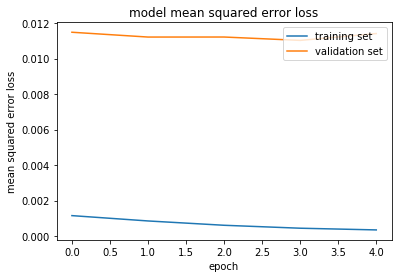

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
ax=plt.gca()
plt.show()